# Week 3 - The finite difference method

This 'week' we are going to solve the PDE of the acoustic/scalar wave equation

\begin{equation}
    \partial_t^2p(x,t) = c^2(x)\bigtriangleup p(x,t) + s(x,t)\,,
\end{equation}
which describes the propagation of sound waves or waves in a string.

## The algorithm

Defining that the increment along the $x-$direction by $dx$. Considering a specific
discrete point $j$, the coresponding $x$ point in the discrete world is $x_j = jdx$
in a regular grid and $j$ is defined in $j = [0,j_{max}]$. Analogously to the discretization
in space, we have the discretization in space. We define that it is defined by an index
$n$ and a given point $t$ is defined as $t=ndt$ and $n = [0,n_{max}]$. These definitions
are called as the space-time discretization.

### Translation for the fields

When we translate this information for other continuous quantities,
like the field, the sources, etc... they become $p(x,t)\rightarrow p_j^n$.
A point at $t+dt$ would be  $p(x,t+dt)\rightarrow p_j^{n+1}$.

The differential operators of the wave equation then acquire a simple form

\begin{equation}
    \partial_t^2p(x,t) = \frac{p(x, t+dt) - 2p(x,t) + p(x,t-dt)}{dt^2}
        \rightarrow \frac{p_j^{n+1} -2p_j^n + p_j^{n-1}}{dt^2}\,,
\end{equation}
and the entire equation

\begin{equation}
    \frac{p_j^{n+1} -2p_j^n + p_j^{n-1}}{dt^2} = c_j^2\frac{p_{j+1}^n -2p_j^n + p_{j-1}^{n}}{dx^2} + s_j^n\,.
\end{equation}

What we have on hands now is points for the pressure in an specific (discrete) point
in three different time levels: $(n+1,n,n-1)$. The idea is therefore, isolate the
point associated to the pressure in the future with respect to the rest of the terms, that is

\begin{equation}
    p_j^{n+1} = c_j^2 \frac{dt^2}{dx^2}\left(p_{j+1}^n -2p_j^n + p_{j-1}^{n}\right)
        +2p_j^n - p_j^{n-1} + s_j^n\,.
\end{equation}

Now we need to solve this "extrapolation problem" and for this form, it is called
\it{fully explicit scheme}, since we can write everything "in the future" as a function
of expressions that we know "from the past".


## Boundaries, source

### Boundary and the initial conditions 

For the boundary condition for scattering of pressure waves we generally
set it equal to zero at the boundaries, which means that we have a
perfectly reflecting boundary. The latter means that all the waves which
are scattered at the boundaries come back into the medium (not being lost
by crossing the boundary).

The initial condition generally is that the pressure is zero, which means
that everything is at rest. Also, for its derivative, we also assume
that it is zero.

Therefore we have

\begin{align}
    p(x=0,t) &= 0\\
    p(x=x_{max},t) &= 0\\
    p(x,t=0) &= 0\\
    \partial p(x,t=0) &= 0\\
\end{align}

### Source term

The idea is to use the Dirac delta function as a source, since we are going to make use
of the Green's function.

COnsidering the space discretazation and taking the case of a source
at a specific point would the correspond to a discrete delta function
"injected" at that point. That is with respect to space, but as the
time goes forward we start injecting energy at this point and the
wave propagates away. This time dependence is often represented by
the first derivative of a Gaussian, allowing it to define a dominant
frequency $f_0$. Consequently the form for the source that we are
looking for is 

\begin{align}
    s(x,t) &= \delta (x-x_s)f(t)\,,\quad \text{with}\\
    f(t)   &= -8f_0(t-t_0)e^{-{(4f_0)^2}.(t-t_0)^2}
\end{align}

## Initialization

Now it is time to find the proper way to discretize space and time.
Actually that is one of the most important questions to be answered
before diving into the problem itself: what are the spatial wavelengths
relevant to the problem?

Typical values for air ($c = 343m/s$), for example, is:

\begin{align}
f_1 = 20Hz &\rightarrow \lambda_1 = 17m\,,\\
f_2 = 50Hz &\rightarrow \lambda_2 = 7m\,,\\
\end{align}
where $\lambda = 7m$ is the smallest wavelength that we have to handle with,
consequently that will guide us through the problem of finding a suitable
number of points for this problem.

Accordingly, one also has to obtain the suitable number of grid points in time!

P.S.: Very nice graphical expĺanation about how the method works.


## Python: waves in 1D

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np


matplotlib.use('nbagg')
# The latter allows to show "videos" herein the matplotlib
#(https://matplotlib.org/3.1.1/users/prev_whats_new/whats_new_1.4.html) ctrl+F (nbagg)

from matplotlib import gridspec
#Apparently for simple plots and grid customization gridspec might be "too much".
#Accordingly to https://matplotlib.org/tutorials/intermediate/gridspec.html:

#For a simple use case such as this, gridspec is perhaps overly verbose.
#You have to create the figure and GridSpec instance separately,
#then pass elements of gridspec instance to the add_subplot()
#method to create the axes objects. The elements of the gridspec
#are accessed in generally the same manner as numpy arrays.

import warnings
warnings.filterwarnings("ignore")
#Ignore warning messages

In [2]:
# Parameter Configuration 
# -----------------------
xmin = 0                #starting spatial point
xmax = 10**4            #ending spatial point
nx = 10**4              #number of spatial grid points
dx = (xmax - xmin)/nx   #spatial step
c0 = 334.               #speed of sound/wave
x_source = int(nx/2)    #location of the source in grid points (in the middle of the grid)
nt = 1001               #number of time steps
dt = 0.0010             #size of the timestep

# Source time function parameters
#--------------------------------

f0 = 25.                #dominant frequency
t0 = 4./f0              #time shift (within the Gaussian argument)


# Snapshot
idisp = 5 # display frequency ##probably the frames per second to be shown in the video? Let's see 

<IPython.core.display.Javascript object>


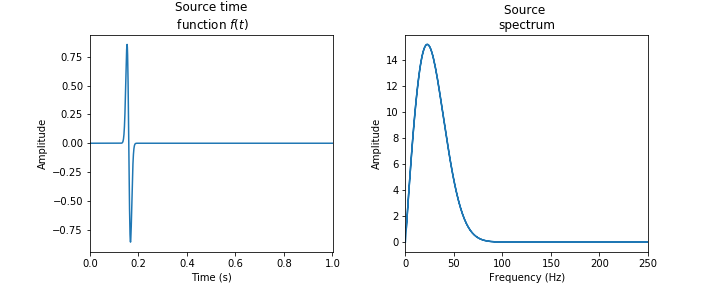

In [3]:
#the vector associated to the time domain

t = np.linspace(0, nt*dt, nt)

#The vector associated to the source, based on
#the equation for it few cells above

source = -8*f0*(t-t0)*np.exp(-(4*f0)**2*(t-t0)**2)

#The fourier transform represents its spectral amplitude and it is given by
spectral = np.fft.fft(source)
w = np.fft.fftfreq(spectral.size, d = dt ) # it this module create a np
                                           # array of the size of "spectral" with intergrid space dt



fig, axis = plt.subplots(1,2, gridspec_kw = {'wspace':0.3}, figsize = (10,4))

axis[0].plot(t,source)
axis[0].set_title('Source time\n function $f(t)$')
axis[0].set_xlim(t[0],t[-1])
axis[0].set_xlabel('Time (s)')
axis[0].set_ylabel('Amplitude')


axis[1].plot(np.abs(w), np.abs(spectral))
axis[1].set_title('Source \nspectrum')
axis[1].set_xlim(w[0],250)
axis[1].set_xlabel('Frequency (Hz)')
axis[1].set_ylabel('Amplitude')
plt.show()


Following the saying from Donald Knuth:

*Premature optimization is the root of all evil.*

Let's do it in a Newbie way:

1st of all, we need to create a vector which simbolizes the
initial state for the pressure. Since at $t=0$ we do not have
any wave pressure the entire vector is zero.

The new vector (at the next time step) is given in terms
of the previous one + the source contribution at the previous
time step. Therefore, we need to create a vector associated to the source.

In [4]:
from scipy.ndimage.interpolation import shift

#Definition of the source function. We assumed that the source function
#is at the mid of the domain and also that it is a 1st derivative Gaussian
#form. Consequently, we only need to create an empty "spatial vector" with it 
# where the value of it at the middle point is given by the time function.

def source_function(t):
    f_source = np.zeros(nx)
    f_source[x_source] = -8*f0*(t-t0)*np.exp(-(4*f0)**2*(t-t0)**2)
    return f_source
    
#Here we initialize the amplitude pressure vector. At the beginning
#it is an null vector. We also already create the auxiliary vectors
#around it.

pj = np.zeros(nx)
p_jp1 = shift(pj,1,cval = 0)
p_jm1 = shift(pj,-1,cval = 0)

#Below we define the pressure amplitude at the instant t+dt. At t=0
#it only has information abou the source. As it starts evolving, it starts
# acquiring information about the neighborhood

def pnew(t):
    return c0**2*(dt**2/dx**2)*(p_jp1 -2*pj + p_jm1) + 2*pj + source_function(t)


## Learning how to make animations using matplotlib

In [5]:
from matplotlib.animation import FuncAnimation #class which repetly cals a function
from IPython import display

In [6]:
#Lets define few stuff fixing what does not need to be changed all the time
#For doing so, lets define an output variable which does that for us
output = plt.plot([])
plt.close() #to not draw anything at the beginning (like empty canvas)

print (output) #generally what we want to deal and update is the single element 2dLines
print (output[0])

Line2D(_line1)


<IPython.core.display.Javascript object>


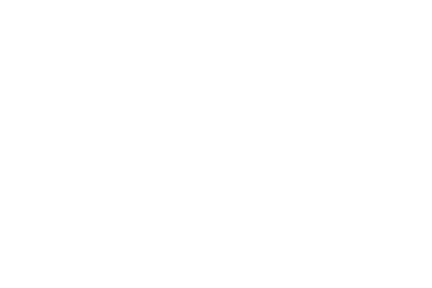

In [7]:
fig = plt.figure() #figure to be animated

lines = plt.plot([])
line  = lines[0]
#A shorter way of doing the same thing, i.e., unpacking and taking the firs
#object is doing the following:
#lines, = plt.plot([])

#Other setup
#Here we could define some stuff like the xlimits and ylimits
#Or static lines/curves that won't change in time

#Now we define the function which we are going to use for calling the FuncAnimation()

### after discussing the video, html, and the display module,
### we come here and ajust the function animate for our example

x = np.linspace(0,2*np.pi,100)
plt.xlim(0,2*np.pi)
plt.ylim(-1.1,1.1)

def animate(frame):
    y = np.sin(x + frame/10)
    #we set the data to our line by using the following command
    line.set_data((x,y))

# Now we implement the class
anim = FuncAnimation(fig, animate, frames = 100, interval = 20)

#anim is now calling the FuncAnimation, but we are unable to see it yet. It still need
#to be transformed into a video format allowing us to see it.
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

In [8]:
pj = np.zeros(nx)
p_jp1 = shift(pj,1,cval = 0)
p_jm1 = shift(pj,-1,cval = 0)

#Below we define the pressure amplitude at the instant t+dt. At t=0
#it only has information abou the source. As it starts evolving, it starts
# acquiring information about the neighborhood

def pnew(t):
    return c0**2*(dt**2/dx**2)*(p_jp1 -2*pj + p_jm1) + 2*pj + source_function(t)


NameError: name 'shift' is not defined

### Okay, so what we have done is not working, gonna come back later.

## Analytical Solutions

So, what we have learned so far (despite not being able to reproduce video it **yet**)
is that we can see graphically the evolution and propagation of a sound wave from
a source

The next step is to find the analytical solution for the acoustic wave equation,
compare with the numerical simulations, quantify the difference and obtain the error

In the absence of source and the initial condition $p(x,0) = p_0(x)\,, \dot{p}(x,0) = 0$
the ordinary solution is

\begin{equation}
    p(x,t) = \frac{1}{2}p(x + ct) + \frac{1}{2}p(x - ct)\,.
\end{equation}


When source is taken into account, we make use of the Green's function.
As we know the Green's function is a solution for the wave equation for a delta-like source


\begin{equation}
        \partial^2_tG(x,t;x_0,t_0) - c^2G(x,t;x_0,t_0) = \delta(x-x_0)\delta(t-t_0)
\end{equation}

The solution of it is the Heaviside function 

\begin{equation}
    G(x,t;x_0,t_0) = \frac{1}{2c}H\left(t-\frac{|x|}{c}\right)
\end{equation}

## Von Neumann Analysis

Numerically, we have seen a couple of difficulties faced
when implementing the simulation. We have an intrinsic
error, but we might also have some dispersion of the
of the pulse and the solution might even explode
(goes to infinity).

The finite difference method allows us to predict when
this kind of numerical phenomena can occur by using the *von Neumann analysis*. 

$\rightarrow$ Okay, simplifying he entire discussion,
the idea is to use plane-wave basis in its discrete form
in the wave equation. Doing so one can find a simple relation
which must be satisfied

\begin{equation}
    \sin^2\left(\frac{\omega dt}{2}\right) = c^2\frac{dt^2}{dx^2}\sin^2\left(\frac{k dx}{2}\right)\,.
\end{equation}

Note that for this equation to have real solution
the following condition must be satisfied

\begin{equation}
    c\frac{dt}{dx} \leq 1\,.
\end{equation}

This condition is known as *Courant-Friedrichs-Lewy* criterion (CFL-criterion).

It relates the physical velocity and the "grid velocity".
It tells us that the grid velocity must be greater than
the physical velocity in the material media. Basically,
if your grid can not be fast enough you "lose" information,
which manifest themselves as a dispersion numerical phenomena (?).

This dispersion can be explicitly seen invertin the equation
involving sines, which lead us to

\begin{equation}
    \frac{\omega}{k} = \frac{2}{kdt}\sin^{-1}\left[c\frac{dt}{dx}\sin\left(\frac{kdx}{2}\right) \right]\,,
\end{equation}
if $dx/dt = c$ the grid velocity exactly matches the physical velocity

### Sampling theory

*What is the minimun wavelength we can describe in our problem?*
The answer is given by the Nyquist wavelength. The Nyquist wavelength is
$\lambda_{Ny} = 2dx \rightarrow k_{Ny} = \frac{\pi}{dx}$. Introducing it
into the equation for the sines  and ploting the phase velocity as a function
of number of grid points per wavelength. We see that if we start with very
few points per wavelength we do not recover the physical velocity.